SA有一个csv文件：

```
date,temp,oxygen,NH3,TP,TN,algae,area,weather,max_temperature,min_temperature,aqi,aqiLevel,wind_direction,wind_power,aqiInfo
2021-06-02,26.1875,6.6665,0.025,0.068275,1.07325,14400000.0,无锡,阴-阵雨,26,21,24,1,东南风,4级,优
2021-06-03,25.881666666666664,6.6418333333333335,0.0251166666666666,0.0637833333333333,0.9151666666666666,10867091.666666666,无锡,阴-阵雨,26,19,66,2,西北风,3级,良
2021-06-04,25.895,7.946333333333333,0.025,0.0637833333333333,0.9203333333333332,25498423.33333333,无锡,阴-多云,26,18,51,2,西南风,3级,良
2021-06-05,26.85,9.084,0.025,0.04776,0.9058,21100000.0,无锡,晴,32,19,67,2,西南风,3级,良
2021-06-06,28.256666666666664,9.514333333333331,0.025,0.0440666666666666,0.9233333333333332,15211340.0,无锡,晴,33,19,80,2,南风,3级,良
2021-06-07,27.635,8.3865,0.025,0.0366499999999999,0.7778333333333333,7994458.333333333,无锡,阴-多云,35,21,68,2,东南风,3级,良
2021-06-08,28.19666666666667,8.397499999999999,0.025,0.0418666666666666,0.7323333333333334,12259158.333333334,无锡,阴-多云,30,24,36,1,东南风,3级,优
2021-06-09,28.751666666666665,8.309166666666668,0.025,0.0389833333333333,0.601,6891956.666666667,无锡,阴-雷阵雨,32,24,52,2,东南风,3级,良
2021-06-10,28.741666666666664,7.385833333333333,0.025,0.03785,0.5256666666666666,6301236.666666667,无锡,阴,28,24,38,1,东南风,2级,优
2021-06-11,29.491666666666664,7.6176666666666675,0.025,0.0327666666666666,0.4495,6244151.666666667,无锡,阴-多云,32,23,82,2,东风,2级,良
2021-06-12,29.58666666666667,7.271999999999999,0.025,0.02975,0.3741666666666667,4201731.666666667,无锡,多云-雷阵雨,33,24,41,1,东南风,3级,优
2021-06-13,29.563333333333333,6.929333333333333,0.025,0.0302833333333333,0.2663333333333333,4964940.0,无锡,阴-小雨,28,25,34,1,西南风,2级,优
2021-06-14,29.58833333333333,6.963166666666666,0.025,0.0290666666666666,0.1886666666666666,5394340.0,无锡,阴-小雨,31,25,46,1,东南风,3级,优
2021-06-15,30.21,7.23925,0.025,0.033425,0.396,6927237.5,无锡,阴-小雨,33,24,48,1,西南风,3级,优
2021-06-16,30.316666666666663,7.396833333333333,0.025,0.0366666666666666,0.4708333333333334,7246886.666666667,无锡,阴-雷阵雨,29,23,34,1,东北风,2级,优
2021-06-17,29.68166666666667,7.344333333333334,0.025,0.0371166666666666,0.284,15886050.0,无锡,小雨,26,24,41,1,东南风,2级,优
```



请你用python分析这个csv的最高温和最低温的温度差。




# 分析温度差与藻类数量的相关性

count    1095.000000
mean        8.276712
std         3.699048
min         0.000000
25%         6.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: temp_difference, dtype: float64


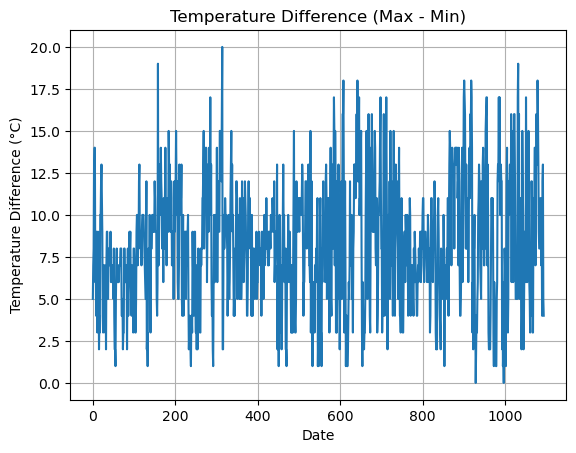

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('/root/Download/AlgaeBloomForecast/merged_data.csv')

# 计算温度差
data['temp_difference'] = data['max_temperature'] - data['min_temperature']

# 输出温度差的统计信息
print(data['temp_difference'].describe())

# 可视化温度差
data['temp_difference'].plot(kind='line', title='Temperature Difference (Max - Min)')
plt.xlabel('Date')
plt.ylabel('Temperature Difference (°C)')
plt.grid(True)
plt.show()


我想分析10度以上的温度差对蓝藻爆发的影响。有没有相关性？或者滞后的相关性？如果有滞后相关性的话，这种滞后相关性分别是几天？

最后，需要你绘制几张图。图片中不用出现中文

# 分析温度差与藻类数量的相关性
import pandas as pd

Correlation between temperature difference (>10) and algae: -0.09908715506653692
Best lag for temperature difference (>10): 0 days with correlation: -0.09908715506653692


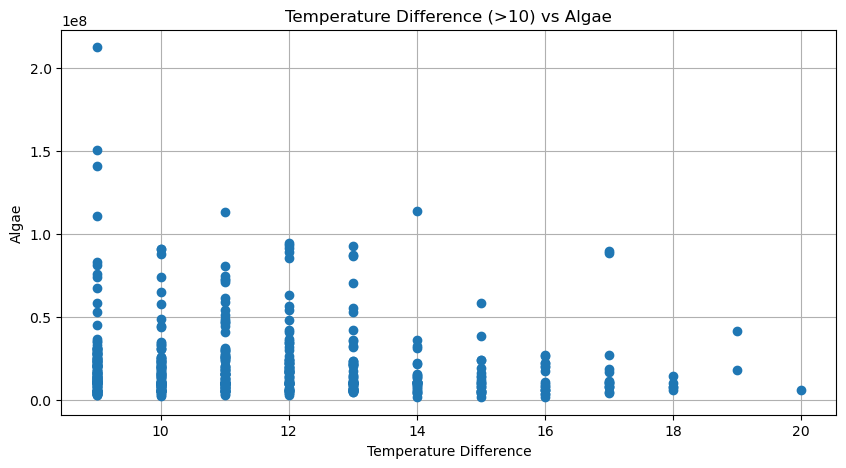

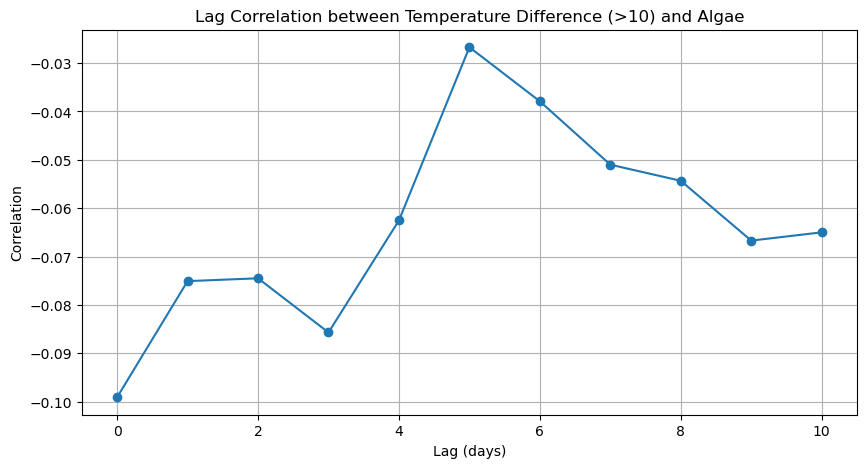

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 加载数据
data = pd.read_csv('/root/Download/AlgaeBloomForecast/merged_data.csv')

# 计算温度差
data['temp_difference'] = data['max_temperature'] - data['min_temperature']

# 筛选出温度差大于10度的数据
data_high_temp_diff = data[data['temp_difference'] >8]

# 计算温度差与藻类的相关性
correlation_temp_diff, _ = pearsonr(data_high_temp_diff['temp_difference'], data_high_temp_diff['algae'])
print(f"Correlation between temperature difference (>10) and algae: {correlation_temp_diff}")

# 检查滞后相关性，最多滞后10天
lags = range(0, 11)
correlations = []
for lag in lags:
    shifted_algae = data_high_temp_diff['algae'].shift(-lag)
    correlation, _ = pearsonr(data_high_temp_diff['temp_difference'][:-lag], shifted_algae[:-lag]) if lag != 0 else pearsonr(data_high_temp_diff['temp_difference'], shifted_algae)
    correlations.append(correlation)

# 找到最大相关性的滞后天数
max_corr = max(correlations, key=abs)
best_lag = correlations.index(max_corr)

print(f"Best lag for temperature difference (>10): {best_lag} days with correlation: {max_corr}")

# 绘制温度差与藻类的相关性图
plt.figure(figsize=(10, 5))
plt.plot(data_high_temp_diff['temp_difference'], data_high_temp_diff['algae'], 'o')
plt.title('Temperature Difference (>10) vs Algae')
plt.xlabel('Temperature Difference')
plt.ylabel('Algae')
plt.grid(True)
plt.show()

# 绘制滞后相关性图
plt.figure(figsize=(10, 5))
plt.plot(lags, correlations, marker='o')
plt.title('Lag Correlation between Temperature Difference (>10) and Algae')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()